## $K$-Means Clustering
#### Gavin Daves, Rice University
#### INDE 577, Dr. Randy Davila

In this notebook, we will utilize $K$-Means Clustering in Python and use the model(s) we create on the Spotify dataset.

In [394]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

import warnings
warnings.filterwarnings('ignore')


sns.set_theme()

In [395]:
# Loading the data

# Add the top-level directory to the system path
sys.path.append('../../')

# Load the data
import clean_data as sd

df = sd.get_df()

# Get a sample of the data

investigation_df = df.sample(1000, random_state=2024)

### Background

This time, let's take a sample of our song data and build $K$-Means Clustering models based on audio metrics. We can compare different methods of picking a $k$ and determine when each may be appropriate.

In [396]:
# Prepare the data

X = investigation_df[['danceability', 'energy', 'loudness', 
          'speechiness', 'acousticness', 'instrumentalness', 
          'liveness', 'valence', 'tempo', 'explicit']]

In [397]:
# PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

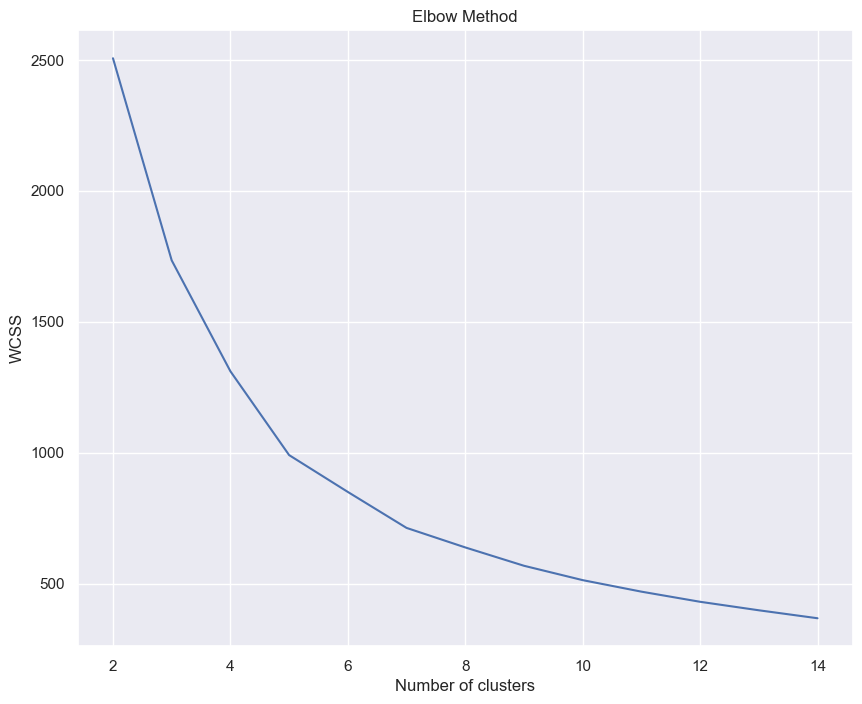

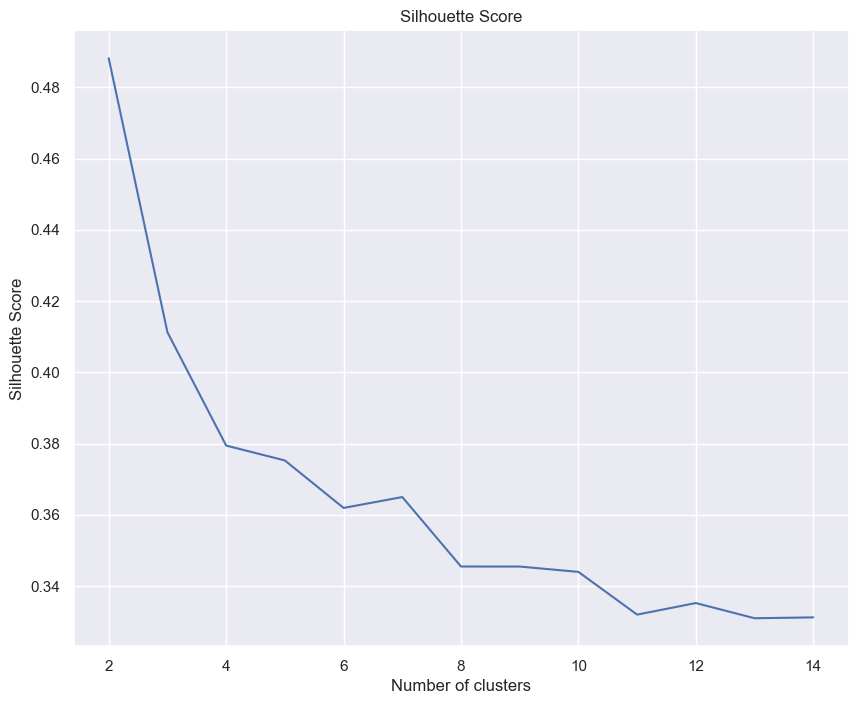

In [398]:
# Implement Elbow Method

from sklearn.cluster import KMeans

wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Analysis over a range of clusters

from sklearn.metrics import silhouette_score

sil = []
kmax = 15

for k in range(2, kmax):
    kmeans = KMeans(n_clusters=k).fit(X_pca)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_pca, labels, metric='euclidean'))
    
plt.figure(figsize=(10, 8))
plt.plot(range(2, kmax), sil)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Picking a $K$

As can be seen in the elbow method plot, the graph forms an "elbow" at $k$=5. In the silhouette analysis plot, we can see that the silhouette score drops as we increase the amount of clusters. The score at $k$ = 5 is fair, but not great. So, there is a tradeoff: do we want to choose a $k$ (say, $k$ = 2) with a large silhouette score, or do we want to trust the elbow method? For our sake, we will explore both.

In [399]:
# Build a KMeans model

elbow_kmeans = KMeans(n_clusters=5, random_state=42, verbose=0)
elbow_kmeans.fit(X_pca)

silhouette_kmeans = KMeans(n_clusters=2, random_state=42, verbose=0)
silhouette_kmeans.fit(X_pca)

KMeans(n_clusters=2, random_state=42)

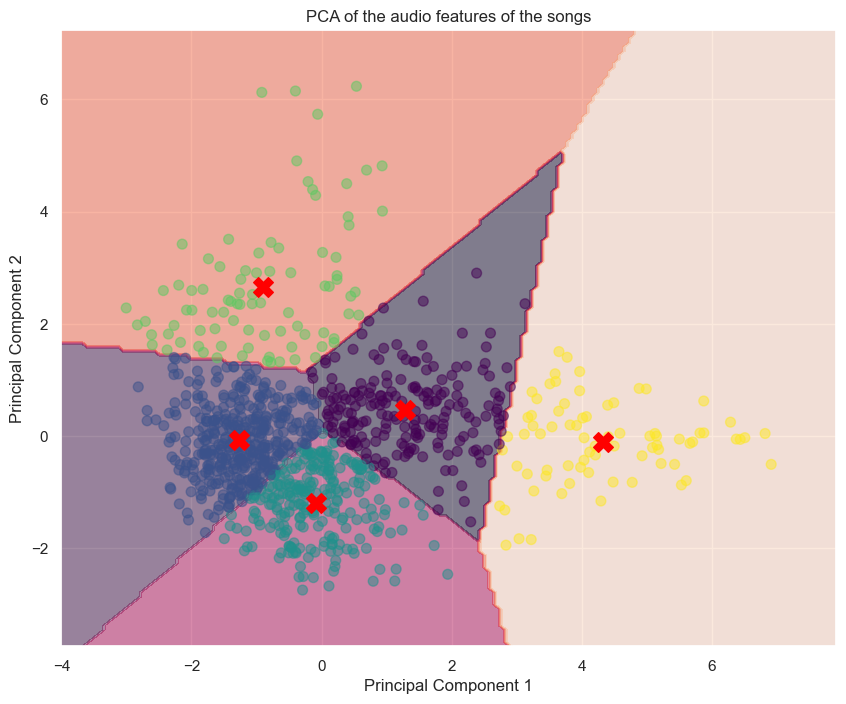

In [400]:
# Visualize the clusters of the elbow method

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150), np.linspace(y_min, y_max, 150))

Z = elbow_kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.5)

# Scatter plot for each category
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c=elbow_kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(elbow_kmeans.cluster_centers_[:, 0], 
            elbow_kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')

plt.title("K-means Clustering with Decision Boundaries")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('PCA of the audio features of the songs (elbow method)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

As we can see in the cluster plot, there are 5 distinct clusters of data that the model is recognizing. Now for the silhouette method:

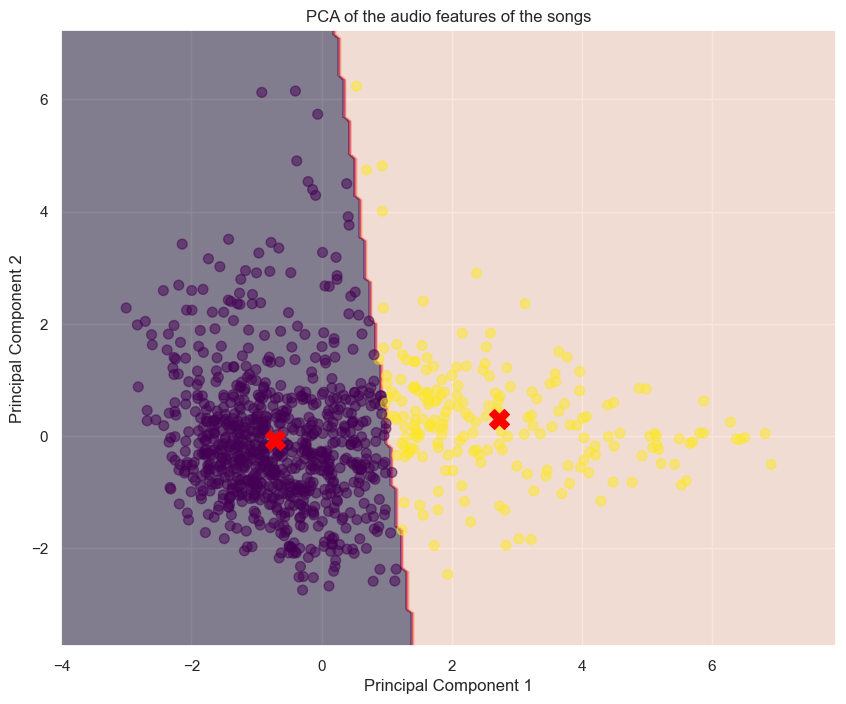

In [401]:
# Visualize the clusters of the silhouette method

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150), np.linspace(y_min, y_max, 150))

Z = silhouette_kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.5)

# Scatter plot for each category
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c=silhouette_kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(silhouette_kmeans.cluster_centers_[:, 0], 
            silhouette_kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')

plt.title("K-means Clustering with Decision Boundaries")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('PCA of the audio features of the songs (silhouette method)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Now, the silhouette method model is recognizing 2 distinct clusters in the data. Let's do a more in-depth metric analysis of both of the methods:

In [407]:
print('The elbow method WCSS is: ', wcss[3])
print('The silhouette method WCSS is: ', wcss[0])

print('The elbow method silhouette score is: ', silhouette_score(X_pca, elbow_kmeans.labels_, metric='euclidean'))
print('The silhouette method silhouette score is: ', silhouette_score(X_pca, silhouette_kmeans.labels_, metric='euclidean'))



The elbow method WCSS is:  991.1219861750544
The silhouette method WCSS is:  2506.428448548008
The elbow method silhouette score is:  0.3752717682329304
The silhouette method silhouette score is:  0.48813766765035005


### So, which model is better?

The answer depends on what aspect of clustering is more critical for the specific application:

- If the primary goal is to have tightly grouped clusters, where the intra-cluster similarity is paramount, then the elbow method might be preferable due to its significantly lower WCSS.
- If the primary goal is to ensure that the clusters are well-defined and distinct from each other, then the silhouette method is better due to its higher silhouette score.

For Spotify's cases, it may be useful to have tightly grouped clusters when recommending songs or artists, and also have distinctly-defined clusters when classifying genres.